# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
# Import necessary libraries for data manipulation and visualization.
import numpy as np         # NumPy for numerical operations
import pandas as pd        # Pandas for data manipulation
import matplotlib.pyplot as plt  # Matplotlib for data visualization

## Importing the dataset

In [2]:
# Read a CSV file containing a dataset into a Pandas DataFrame.
dataset = pd.read_csv("Position_Salaries.csv")

# Extract the independent variable (feature) values (X) from the dataset.
# Here, we select all rows and all columns except the last one.
x = dataset.iloc[:, 1:-1].values

# Extract the dependent variable (target) values (Y) from the dataset.
# Here, we select all rows and only the last column.
y = dataset.iloc[:, -1].values

In [3]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [4]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [5]:
# Reshape the 'y' array to change its shape to (n, 1), where 'n' is the number of elements in 'y'.
y = y.reshape(len(y), 1)

## Feature Scaling

In [6]:
# Import necessary libraries for standardization.
from sklearn.preprocessing import StandardScaler

# Create StandardScaler instances for 'x' and 'y'.
sc_x = StandardScaler()
sc_y = StandardScaler()

# Standardize 'x' and 'y' data.
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [7]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [8]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole dataset

In [9]:
# Import the Support Vector Regression (SVR) class from scikit-learn.
from sklearn.svm import SVR

# Create an SVR model with the "rbf" (Radial Basis Function) kernel.
svr = SVR(kernel="rbf")

# Fit the SVR model to the standardized 'x' and 'y' data.
svr.fit(x, y)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [10]:
# Use the SVR model to predict a standardized value for 'x = 6.5'.
y_pred = svr.predict(sc_x.transform([[6.5]]))

# Inverse-transform the predicted value to the original scale.
# This step scales 'y_pred' back to its original range.
result = sc_y.inverse_transform(y_pred.reshape(-1, 1))

## Visualising the SVR results

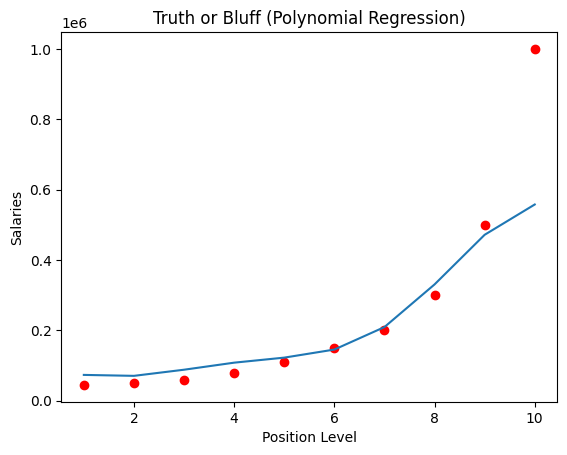

In [12]:
# Create a scatter plot for the original 'x' and 'y' values (inverse-transformed).
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')

# Plot the SVR model's predictions for the original 'x' values (inverse-transformed).
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(svr.predict(x).reshape(-1, 1)))

# Set the plot title, x-axis label, and y-axis label.
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel("Position Level")
plt.ylabel("Salaries")

# Display the plot.
plt.show()